In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df = df_train.copy()
df.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [4]:
test = df_test.copy()
test.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,USA,103232799,Caucasian,Male,[80-90),?,HM,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,USA,93395304,Caucasian,Male,[20-30),?,HM,0,0,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,USA,6281586,AfricanAmerican,Male,[30-40),?,?,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,USA,67381308,Caucasian,Male,[50-60),?,BC,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,USA,71670204,Caucasian,Male,[60-70),?,?,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [5]:
df.replace('?', np.nan, inplace = True)
df.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [6]:
test.replace('?', np.nan, inplace = True)
test.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,USA,103232799,Caucasian,Male,[80-90),NaN,HM,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,USA,93395304,Caucasian,Male,[20-30),NaN,HM,0,0,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,USA,6281586,AfricanAmerican,Male,[30-40),NaN,NaN,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,USA,67381308,Caucasian,Male,[50-60),NaN,BC,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,USA,71670204,Caucasian,Male,[60-70),NaN,NaN,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           71236 non-null  int64 
 1   country                                71236 non-null  object
 2   patient_id                             71236 non-null  int64 
 3   race                                   66166 non-null  object
 4   gender                                 71236 non-null  object
 5   age                                    67679 non-null  object
 6   weight                                 2246 non-null   object
 7   payer_code                             43035 non-null  object
 8   outpatient_visits_in_previous_year     71236 non-null  int64 
 9   emergency_visits_in_previous_year      71236 non-null  int64 
 10  inpatient_visits_in_previous_year      71236 non-null  int64 
 11  admission_type 

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30530 entries, 0 to 30529
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           30530 non-null  int64 
 1   country                                30530 non-null  object
 2   patient_id                             30530 non-null  int64 
 3   race                                   28339 non-null  object
 4   gender                                 30530 non-null  object
 5   age                                    28999 non-null  object
 6   weight                                 951 non-null    object
 7   payer_code                             18475 non-null  object
 8   outpatient_visits_in_previous_year     30530 non-null  int64 
 9   emergency_visits_in_previous_year      30530 non-null  int64 
 10  inpatient_visits_in_previous_year      30530 non-null  int64 
 11  admission_type 

In [9]:
(df['weight'].count() / len(df)) * 100

# Since we don't have enough data for the weight column anyway (3%) I think its safe to remove it
df = df.drop(columns = 'weight')
df.head()

,encounter_id,country,patient_id,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),NaN,0,0,2,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,0,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),NaN,0,0,1,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),MC,0,0,1,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),HM,1,0,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [10]:
(test['weight'].count() / len(test)) * 100

# Since we don't have enough data for the weight column anyway (3%) I think its safe to remove it
test = test.drop(columns = 'weight')
test.head()

,encounter_id,country,patient_id,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,USA,103232799,Caucasian,Male,[80-90),HM,0,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,USA,93395304,Caucasian,Male,[20-30),HM,0,0,1,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,USA,6281586,AfricanAmerican,Male,[30-40),NaN,0,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,USA,67381308,Caucasian,Male,[50-60),BC,0,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,USA,71670204,Caucasian,Male,[60-70),NaN,0,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [11]:
df['country'].unique()

array(['USA'], dtype=object)

In [12]:
# In the column country US is the only value so we can drop this one too
df = df.drop(columns = "country")
df.head()

,encounter_id,patient_id,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,70110,Caucasian,Female,[70-80),NaN,0,0,2,Emergency,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,29775006,AfricanAmerican,Male,[50-60),NaN,0,0,0,Emergency,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,80729253,Caucasian,Female,[60-70),NaN,0,0,1,NaN,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,2919042,AfricanAmerican,Male,[60-70),MC,0,0,1,Emergency,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,84871971,Caucasian,Female,[70-80),HM,1,0,0,Elective,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [13]:
test = test.drop(columns = "country")
test.head()

,encounter_id,patient_id,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,103232799,Caucasian,Male,[80-90),HM,0,0,0,Emergency,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,93395304,Caucasian,Male,[20-30),HM,0,0,1,Emergency,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,6281586,AfricanAmerican,Male,[30-40),NaN,0,0,0,Emergency,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,67381308,Caucasian,Male,[50-60),BC,0,0,0,Not Available,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,71670204,Caucasian,Male,[60-70),NaN,0,0,0,Emergency,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [14]:
# Age is in brackets so we better change that
age_bins = {'[0-10)': 0,'[10-20)': 1,'[20-30)': 2,'[30-40)': 3,'[40-50)': 4,'[50-60)': 5,'[60-70)': 6,'[70-80)': 7,'[80-90)': 8,'[90-100)': 9}

df['age'] = df['age'].replace(age_bins)
df.head()

,encounter_id,patient_id,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,70110,Caucasian,Female,7.0,NaN,0,0,2,Emergency,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,29775006,AfricanAmerican,Male,5.0,NaN,0,0,0,Emergency,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,80729253,Caucasian,Female,6.0,NaN,0,0,1,NaN,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,2919042,AfricanAmerican,Male,6.0,MC,0,0,1,Emergency,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,84871971,Caucasian,Female,7.0,HM,1,0,0,Elective,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [15]:
# Age is in brackets so we better change that
test['age'] = test['age'].replace(age_bins)
test.head()

,encounter_id,patient_id,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,103232799,Caucasian,Male,8.0,HM,0,0,0,Emergency,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,93395304,Caucasian,Male,2.0,HM,0,0,1,Emergency,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,6281586,AfricanAmerican,Male,3.0,NaN,0,0,0,Emergency,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,67381308,Caucasian,Male,5.0,BC,0,0,0,Not Available,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,71670204,Caucasian,Male,6.0,NaN,0,0,0,Emergency,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [16]:
# prescribed_diabetes_meds and readmitted_binary better to change them to numerical
df["prescribed_diabetes_meds"].unique(), df["readmitted_binary"].unique()

(array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object))

In [17]:
mapping = {'Yes': 1, 'No': 0}

df['prescribed_diabetes_meds'] = df['prescribed_diabetes_meds'].replace(mapping)
df['readmitted_binary'] = df['readmitted_binary'].replace(mapping)

df.head()

,encounter_id,patient_id,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,70110,Caucasian,Female,7.0,NaN,0,0,2,Emergency,...,276,466,8,NaN,NaN,No,0,[],0,>30 days
1,426224,29775006,AfricanAmerican,Male,5.0,NaN,0,0,0,Emergency,...,785,162,9,NaN,NaN,No,1,['insulin'],0,No
2,634063,80729253,Caucasian,Female,6.0,NaN,0,0,1,NaN,...,135,250,6,NaN,NaN,Ch,1,"['glimepiride', 'insulin']",0,No
3,890610,2919042,AfricanAmerican,Male,6.0,MC,0,0,1,Emergency,...,562,455,5,NaN,NaN,No,0,[],0,No
4,654194,84871971,Caucasian,Female,7.0,HM,1,0,0,Elective,...,599,428,9,NaN,NaN,No,0,[],0,>30 days


In [18]:
(df["age"].isna().sum() / len(df)) * 100

4.993261833904206

In [19]:
# In my opinion the age is an important variable and since 5% of the data has no value for age i think we can delete the rows
df.dropna(subset = ["age"], inplace = True)
df

,encounter_id,patient_id,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,70110,Caucasian,Female,7.0,NaN,0,0,2,Emergency,...,276,466,8,NaN,NaN,No,0,[],0,>30 days
1,426224,29775006,AfricanAmerican,Male,5.0,NaN,0,0,0,Emergency,...,785,162,9,NaN,NaN,No,1,['insulin'],0,No
2,634063,80729253,Caucasian,Female,6.0,NaN,0,0,1,NaN,...,135,250,6,NaN,NaN,Ch,1,"['glimepiride', 'insulin']",0,No
3,890610,2919042,AfricanAmerican,Male,6.0,MC,0,0,1,Emergency,...,562,455,5,NaN,NaN,No,0,[],0,No
4,654194,84871971,Caucasian,Female,7.0,HM,1,0,0,Elective,...,599,428,9,NaN,NaN,No,0,[],0,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,660160,24531381,AfricanAmerican,Female,8.0,MC,0,1,0,Elective,...,786,250,9,NaN,>7,Ch,1,"['metformin', 'glyburide', 'insulin']",0,No
71232,826429,4663818,AfricanAmerican,Female,7.0,NaN,0,0,0,Urgent,...,197,V66,6,NaN,>7,Ch,1,"['metformin', 'glyburide']",0,No
71233,332030,23397147,Caucasian,Female,6.0,NaN,0,2,2,NaN,...,491,276,9,>300,NaN,Ch,1,"['glyburide', 'insulin']",1,<30 days
71234,757560,52161750,Caucasian,Male,6.0,BC,0,0,2,Emergency,...,157,250.8,5,NaN,NaN,Ch,1,"['glyburide', 'insulin']",0,No


In [20]:
# In my opinion the age is an important variable and since 5% of the data has no value for age i think we can delete the rows
test.dropna(subset = ["age"], inplace = True)
test

,encounter_id,patient_id,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,103232799,Caucasian,Male,8.0,HM,0,0,0,Emergency,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,93395304,Caucasian,Male,2.0,HM,0,0,1,Emergency,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,6281586,AfricanAmerican,Male,3.0,NaN,0,0,0,Emergency,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,67381308,Caucasian,Male,5.0,BC,0,0,0,Not Available,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,71670204,Caucasian,Male,6.0,NaN,0,0,0,Emergency,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30524,798363,3009978,NaN,Male,5.0,NaN,0,0,0,Elective,...,11,682,428,425,4,NaN,NaN,No,No,[]
30525,451150,85707450,Caucasian,Male,7.0,HM,0,0,0,Emergency,...,11,584,276,276,9,NaN,NaN,No,No,[]
30526,549298,328887,Caucasian,Male,6.0,NaN,0,0,4,Emergency,...,19,428,250.83,276,9,NaN,NaN,No,Yes,['insulin']
30527,327586,21915459,Caucasian,Female,8.0,NaN,0,0,0,Emergency,...,22,996,403,250,6,NaN,NaN,No,Yes,['insulin']


In [21]:
df["payer_code"].unique()

array([nan, 'MC', 'HM', 'UN', 'SP', 'SI', 'CM', 'DM', 'CP', 'MD', 'BC',
       'OG', 'PO', 'WC', 'OT', 'MP', 'CH', 'FR'], dtype=object)

In [22]:
# Instead of having nan as a fill value its better if we just have an empty string
df["payer_code"] = df["payer_code"].replace({np.nan: "None"})
df.head()

,encounter_id,patient_id,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,70110,Caucasian,Female,7.0,None,0,0,2,Emergency,...,276,466,8,NaN,NaN,No,0,[],0,>30 days
1,426224,29775006,AfricanAmerican,Male,5.0,None,0,0,0,Emergency,...,785,162,9,NaN,NaN,No,1,['insulin'],0,No
2,634063,80729253,Caucasian,Female,6.0,None,0,0,1,NaN,...,135,250,6,NaN,NaN,Ch,1,"['glimepiride', 'insulin']",0,No
3,890610,2919042,AfricanAmerican,Male,6.0,MC,0,0,1,Emergency,...,562,455,5,NaN,NaN,No,0,[],0,No
4,654194,84871971,Caucasian,Female,7.0,HM,1,0,0,Elective,...,599,428,9,NaN,NaN,No,0,[],0,>30 days


In [23]:
# Instead of having nan as a fill value its better if we just have an empty string
test["payer_code"] = test["payer_code"].replace({np.nan: "None"})
test.head()

,encounter_id,patient_id,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,103232799,Caucasian,Male,8.0,HM,0,0,0,Emergency,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,93395304,Caucasian,Male,2.0,HM,0,0,1,Emergency,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,6281586,AfricanAmerican,Male,3.0,None,0,0,0,Emergency,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,67381308,Caucasian,Male,5.0,BC,0,0,0,Not Available,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,71670204,Caucasian,Male,6.0,None,0,0,0,Emergency,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [24]:
(df['glucose_test_result'].count() / len(df)) * 100

5.16556095686993

In [25]:
# Lets group the readmitted by age bins
grouped_age = df.groupby('age')
count_age = grouped_age['readmitted_binary'].count()
count_age

age
0.0      105
1.0      474
2.0     1071
3.0     2536
4.0     6418
5.0    11423
6.0    14908
7.0    17359
8.0    11510
9.0     1875
Name: readmitted_binary, dtype: int64

In [26]:
grouped_gender = df.groupby('gender')
count_gen = grouped_gender['readmitted_binary'].count()
count_gen

gender
Female             36348
Male               31328
Unknown/Invalid        3
Name: readmitted_binary, dtype: int64

In [27]:
# We notice that both male and female are both equally likely to be admitted
# So i think we can drop the column
df = df.drop(columns = "gender")
df.head()

,encounter_id,patient_id,race,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,70110,Caucasian,7.0,None,0,0,2,Emergency,Family/GeneralPractice,...,276,466,8,NaN,NaN,No,0,[],0,>30 days
1,426224,29775006,AfricanAmerican,5.0,None,0,0,0,Emergency,NaN,...,785,162,9,NaN,NaN,No,1,['insulin'],0,No
2,634063,80729253,Caucasian,6.0,None,0,0,1,NaN,Family/GeneralPractice,...,135,250,6,NaN,NaN,Ch,1,"['glimepiride', 'insulin']",0,No
3,890610,2919042,AfricanAmerican,6.0,MC,0,0,1,Emergency,InternalMedicine,...,562,455,5,NaN,NaN,No,0,[],0,No
4,654194,84871971,Caucasian,7.0,HM,1,0,0,Elective,NaN,...,599,428,9,NaN,NaN,No,0,[],0,>30 days


In [28]:
# We notice that both male and female are both equally likely to be admitted
# So i think we can drop the column
test = test.drop(columns = "gender")
test.head()

,encounter_id,patient_id,race,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,103232799,Caucasian,8.0,HM,0,0,0,Emergency,NaN,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,93395304,Caucasian,2.0,HM,0,0,1,Emergency,NaN,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,6281586,AfricanAmerican,3.0,None,0,0,0,Emergency,Pulmonology,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,67381308,Caucasian,5.0,BC,0,0,0,Not Available,NaN,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,71670204,Caucasian,6.0,None,0,0,0,Emergency,InternalMedicine,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [29]:
grouped_race = df.groupby('race')
count_race = grouped_race['readmitted_binary'].count()
count_race

race
AfricanAmerican    12062
Asian                409
Caucasian          48126
Hispanic            1292
Other                945
Name: readmitted_binary, dtype: int64

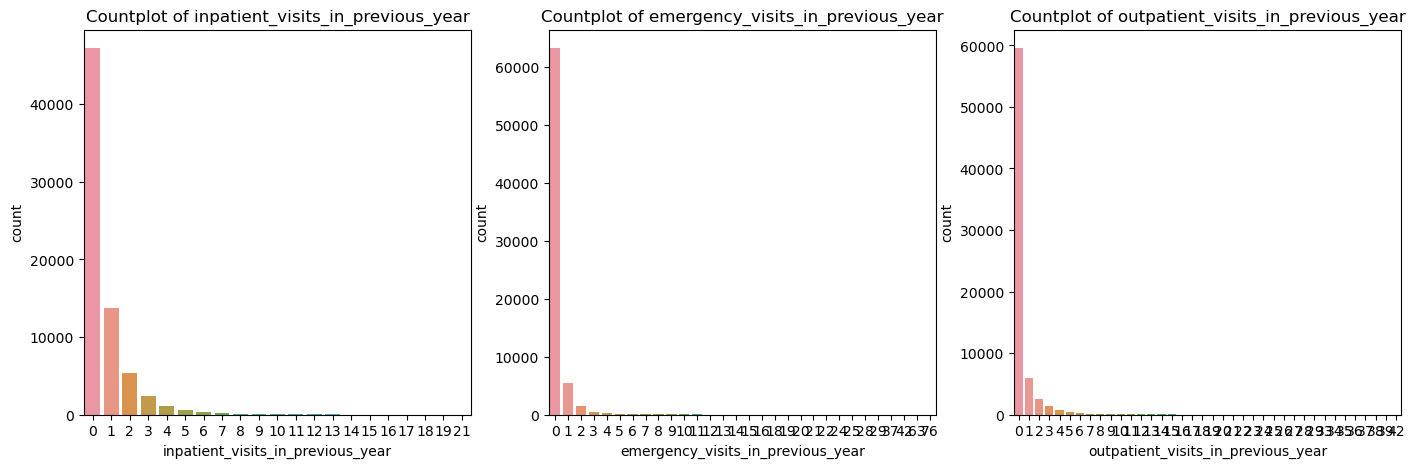

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

sns.countplot(x='inpatient_visits_in_previous_year', data=df_train, ax=axes[0])
sns.countplot(x='emergency_visits_in_previous_year', data=df_train, ax=axes[1])
sns.countplot(x='outpatient_visits_in_previous_year', data=df_train, ax=axes[2])
axes[0].set_title("Countplot of inpatient_visits_in_previous_year")
axes[1].set_title("Countplot of emergency_visits_in_previous_year")
axes[2].set_title("Countplot of outpatient_visits_in_previous_year")
plt.show()

In [31]:
len(df[(df['inpatient_visits_in_previous_year'] > 3) & (df['readmitted_binary'] == 1)])/len(df[df['inpatient_visits_in_previous_year'] > 3])

0.3053403995108031

In [32]:
df.isna().sum()

encounter_id                                 0
patient_id                                   0
race                                      4845
age                                          0
payer_code                                   0
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3503
medical_specialty                        33125
average_pulse_bpm                            0
discharge_disposition                     2457
admission_source                          4490
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_diagnosis                        255
additional_diagnosis                       962
number_diagnoses                             0
glucose_test_

In [33]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\ilyas\AppData\Local\Temp\ipykernel_8596\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,encounter_id,patient_id,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,prescribed_diabetes_meds,readmitted_binary
encounter_id,1.000000,-0.035409,-0.003883,-0.004596,0.000286,0.007503,-0.004990,0.003699,0.000339,-0.002188,0.005247,-0.010000,0.001144,0.005483
patient_id,-0.035409,1.000000,0.072140,0.102322,0.062826,0.013132,0.004517,-0.022406,0.017668,-0.017839,0.021990,0.224994,0.021234,0.007180
age,-0.003883,0.072140,1.000000,0.023540,-0.084700,-0.039791,0.004040,0.112044,0.023019,-0.031962,0.043753,0.244500,-0.022474,0.020570
outpatient_visits_in_previous_year,-0.004596,0.102322,0.023540,1.000000,0.088905,0.103972,0.006125,-0.006742,-0.005750,-0.021806,0.044135,0.093174,0.016377,0.018859
emergency_visits_in_previous_year,0.000286,0.062826,-0.084700,0.088905,1.000000,0.270634,-0.008467,-0.009222,0.001407,-0.036351,0.015316,0.056925,0.025464,0.060391
inpatient_visits_in_previous_year,0.007503,0.013132,-0.039791,0.103972,0.270634,1.000000,0.000955,0.075302,0.042576,-0.065967,0.066343,0.108861,0.022472,0.165073
average_pulse_bpm,-0.004990,0.004517,0.004040,0.006125,-0.008467,0.000955,1.000000,0.004191,0.001902,-0.000979,0.003644,0.001428,0.003233,0.000989
length_of_stay_in_hospital,0.003699,-0.022406,0.112044,-0.006742,-0.009222,0.075302,0.004191,1.000000,0.315931,0.192107,0.465320,0.221864,0.063130,0.038618
number_lab_tests,0.000339,0.017668,0.023019,-0.005750,0.001407,0.042576,0.001902,0.315931,1.000000,0.054139,0.263960,0.155497,0.034355,0.019703
non_lab_procedures,-0.002188,-0.017839,-0.031962,-0.021806,-0.036351,-0.065967,-0.000979,0.192107,0.054139,1.000000,0.386853,0.075023,-0.003950,-0.016015


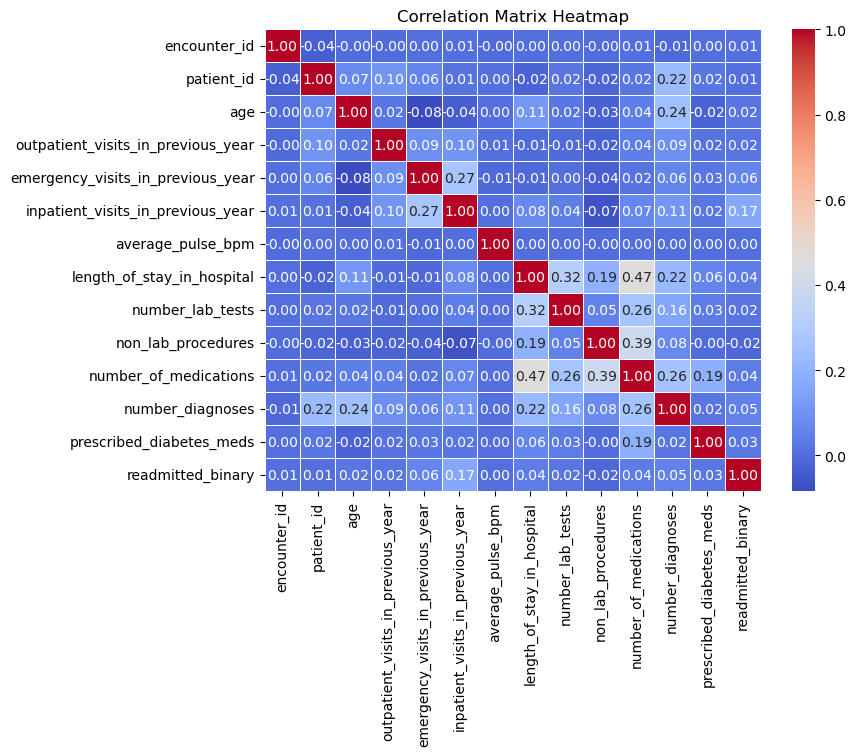

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [35]:
# One Hot Encoding
ohe_race = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform = 'pandas')

ohe_transform_race = ohe_race.fit_transform(df['race'].values.reshape(-1,1))

df = pd.concat([df, ohe_transform_race], axis = 1).drop(columns = ["race"])
df.head()

,encounter_id,patient_id,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,average_pulse_bpm,...,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass,x0_Asian,x0_Caucasian,x0_Hispanic,x0_Other,x0_nan
0,533253.0,70110.0,7.0,None,0.0,0.0,2.0,Emergency,Family/GeneralPractice,127.0,...,No,0.0,[],0.0,>30 days,0.0,1.0,0.0,0.0,0.0
1,426224.0,29775006.0,5.0,None,0.0,0.0,0.0,Emergency,NaN,128.0,...,No,1.0,['insulin'],0.0,No,0.0,0.0,0.0,0.0,0.0
2,634063.0,80729253.0,6.0,None,0.0,0.0,1.0,NaN,Family/GeneralPractice,94.0,...,Ch,1.0,"['glimepiride', 'insulin']",0.0,No,0.0,1.0,0.0,0.0,0.0
3,890610.0,2919042.0,6.0,MC,0.0,0.0,1.0,Emergency,InternalMedicine,81.0,...,No,0.0,[],0.0,No,0.0,0.0,0.0,0.0,0.0
4,654194.0,84871971.0,7.0,HM,1.0,0.0,0.0,Elective,NaN,126.0,...,No,0.0,[],0.0,>30 days,0.0,1.0,0.0,0.0,0.0


In [36]:
# One Hot Encoding
ohe_test_race = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform = 'pandas')

ohe_transform_test_race = ohe_test_race.fit_transform(test['race'].values.reshape(-1,1))

test = pd.concat([test, ohe_transform_test_race], axis = 1).drop(columns = ["race"])
test.head()

,encounter_id,patient_id,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,average_pulse_bpm,...,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,x0_Asian,x0_Caucasian,x0_Hispanic,x0_Other,x0_nan
0,499502.0,103232799.0,8.0,HM,0.0,0.0,0.0,Emergency,NaN,139.0,...,NaN,NaN,No,Yes,['metformin'],0.0,1.0,0.0,0.0,0.0
1,447319.0,93395304.0,2.0,HM,0.0,0.0,1.0,Emergency,NaN,103.0,...,>300,NaN,No,No,[],0.0,1.0,0.0,0.0,0.0
2,309126.0,6281586.0,3.0,None,0.0,0.0,0.0,Emergency,Pulmonology,99.0,...,NaN,NaN,No,Yes,['insulin'],0.0,0.0,0.0,0.0,0.0
3,181183.0,67381308.0,5.0,BC,0.0,0.0,0.0,Not Available,NaN,136.0,...,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']",0.0,1.0,0.0,0.0,0.0
4,359339.0,71670204.0,6.0,None,0.0,0.0,0.0,Emergency,InternalMedicine,137.0,...,NaN,NaN,No,Yes,['metformin'],0.0,1.0,0.0,0.0,0.0


# Training variables
X_train = df.drop(['readmitted_binary'], axis = 1)
y_train = df['readmitted_binary']

# Test
X_test = test


# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create model
model = LogisticRegression()

#Training
model.fit(X_train_scaled, y_train)

#Prediction
y_pred = model.predict(X_test_scaled)